# Homework 3

### Q1 Downloading the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('/Users/riyachanduka/Downloads/qb.train.csv')

In [3]:
df.head()

,row,body_score,page,answer,text,category,tournaments,answer_type,corr,inlinks
0,1,127.398036,Comus (John Milton),Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,work,True,62
1,2,50.212336,Circe,Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,None,False,5
2,3,44.767071,Satyr,Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,None,False,6
3,4,44.058274,Philip K. Dick,Wilfred Owen,This author is convinced by another to publish...,Literature,2009 ACF Winter,people,False,22
4,5,40.675249,Honore de Balzac,Wilfred Owen,This author is convinced by another to publish...,Literature,2009 ACF Winter,None,False,0


In [4]:
X=df.iloc[:,[1,2,3,6,7,9]].values
#print(df.iloc[:,[1,6,7,9]])
y=df.iloc[:, 8].values

In [5]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [6]:
label_encoder_1=LabelEncoder()
label_encoder_1.fit(X[:, 1])
X[:, 1]=label_encoder_1.transform(X[:, 1])#Convert categorical data to labels

label_encoder_2=LabelEncoder()
label_encoder_2.fit(X[:, 2])
X[:, 2]=label_encoder_2.transform(X[:, 2])

label_encoder_4=LabelEncoder()
label_encoder_4.fit(X[:, 4])
X[:, 4]=label_encoder_4.transform(X[:, 4])

label_encoder_5=LabelEncoder()
label_encoder_5.fit(X[:, 3])
X[:, 3]=label_encoder_5.transform(X[:, 3])

label_encoder_corr=LabelEncoder()
label_encoder_corr.fit(y)
y=label_encoder_corr.transform(y)

# #Convert the labels to categorical data
one_hot_encoder=OneHotEncoder(categorical_features=[1,2,3,4],sparse=False)
one_hot_encoder.fit(X)
X=one_hot_encoder.transform(X)
# #To remove Multi collinearity
# #delete first column of each categorical variable
X=np.delete(X,one_hot_encoder.feature_indices_[: -1],1)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [8]:
# =============================================================================
# Scaling our data
# =============================================================================
from sklearn.preprocessing import StandardScaler
#formula for standard scaler x-mu/sigma
sc=StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

### Q2 Building the best classifier 

### Building model using columns bodyscore, page, answer, tournaments, answer_type and inlinks 

### 1. Building Logistic Regression Model

In [9]:
from sklearn.linear_model import LogisticRegression
#lr= LinearRegression(fit_intercept=False)
glm_model=LogisticRegression()
glm_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
# =============================================================================
# Prediction using the model
# =============================================================================
y_pred=glm_model.predict(X_test)
y_pred_prob=glm_model.predict_proba(X_test)[:,1]
y_test

array([1, 0, 1, ..., 0, 0, 0])

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7852722772277227

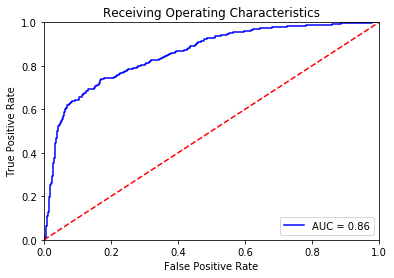

In [12]:
# =============================================================================
# ROC curve 
# =============================================================================
from sklearn.metrics import roc_curve,roc_auc_score

fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)
plt.title('Receiving Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'%auc_score)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### 2. Building Decision Tree Model

In [13]:
from sklearn.tree import DecisionTreeClassifier

tree_model=DecisionTreeClassifier()
tree_model.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
y_pred=tree_model.predict(X_test)
y_pred_prob=tree_model.predict_proba(X_test)[:,1]

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7908415841584159

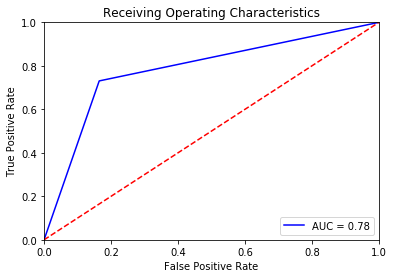

In [16]:
# =============================================================================
# ROC curve 
# =============================================================================
from sklearn.metrics import roc_curve,roc_auc_score

fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)
plt.title('Receiving Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'%auc_score)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### 3. Building SVM Model 

In [17]:
from sklearn.svm import SVC

In [18]:
svm_class=SVC(kernel='rbf',random_state=0,probability=True)

In [19]:
svm_class.fit(X_train,y_train)
y_pred=svm_class.predict(X_test)
y_pred_prob=svm_class.predict_proba(X_test)[:,1]

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.781559405940594

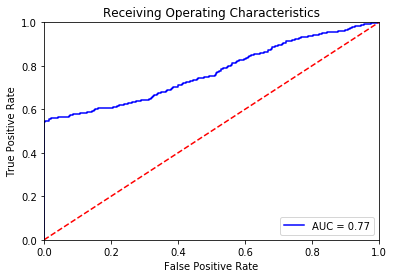

In [21]:
# =============================================================================
# ROC curve 
# =============================================================================
from sklearn.metrics import roc_curve,roc_auc_score

fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)
plt.title('Receiving Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'%auc_score)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Removing page and answer as page values are all different in the actual train and test dataset and answer column is not present in the test dataset.


In [22]:
X = df.iloc[:, [1,6,7,9]].values
y = df.iloc[:, 8].values 

In [23]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder_tournaments = LabelEncoder()
label_encoder_answertype = LabelEncoder()

label_encoder_tournaments.fit(X[:,1]) #never enter multiple column here, it doesn't work
X[:,1] = label_encoder_tournaments.transform(X[:,1])

label_encoder_answertype.fit(X[:,2]) #never enter multiple column here, it doesn't work
X[:,2] = label_encoder_answertype.transform(X[:,2])

one_hot_encoder = OneHotEncoder(categorical_features=[1,2], sparse=False)
one_hot_encoder.fit(X)
X= one_hot_encoder.transform(X)

In [24]:
label_encoder_corr = LabelEncoder()
label_encoder_corr.fit(y) #never enter multiple column here, it doesn't work
y = label_encoder_corr.transform(y)

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 0 ) 

### Building Logistic Regression Model 

In [26]:
from sklearn.linear_model import LogisticRegression

glm_model = LogisticRegression()
glm_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
y_pred = glm_model.predict(X_test)
y_pred_prob = glm_model.predict_proba(X_test) [:, 1]

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6670792079207921

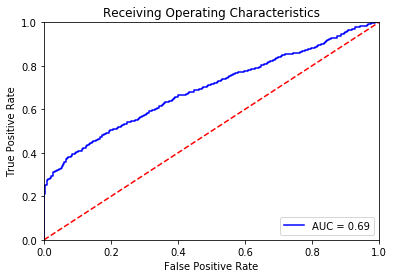

In [29]:
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)
plt.title('Receiving Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'%auc_score)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Building Decision Tree Model

In [30]:
from sklearn.tree import DecisionTreeClassifier

tree_model=DecisionTreeClassifier()
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [31]:
y_pred=tree_model.predict(X_test)
y_pred_prob=tree_model.predict_proba(X_test)[:,1]

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7326732673267327

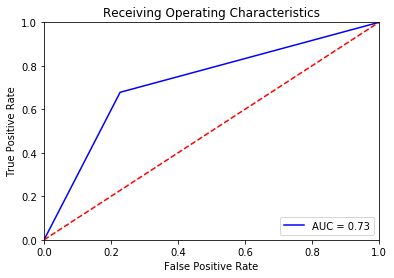

In [33]:
# =============================================================================
# ROC curve 
# =============================================================================
from sklearn.metrics import roc_curve,roc_auc_score

fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)
plt.title('Receiving Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'%auc_score)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Building SVM Model 

In [34]:
from sklearn.svm import SVC

In [35]:
svm_class = SVC(kernel='rbf', random_state=0, probability=True)
svm_class.fit(X_train,y_train)
y_pred = svm_class.predict(X_test)
y_pred_prob = svm_class.predict_proba(X_test) [:, 1]

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7797029702970297

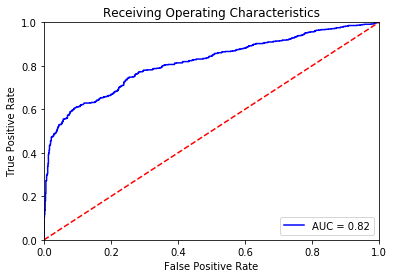

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)
plt.title('Receiving Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'%auc_score)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Accuracy Matrix 

In [38]:
accuracy_matrix=pd.DataFrame(columns=['Model Name','Accuracy Score'])
accuracy_matrix.loc[0]=['Decision Tree','0.73']
accuracy_matrix.loc[1]=['SVM','0.78']
accuracy_matrix.loc[2]=['Logistic Regression','0.68']
accuracy_matrix.head()

,Model Name,Accuracy Score
0,Decision Tree,0.73
1,SVM,0.78
2,Logistic Regression,0.68


### The best accuracy of 78% is coming using SVM Model 

### Q3 To improve the predictions I'm extracting the length of the column text and also the year of the tournament.

In [41]:
import re
pattern = "^[0-9][0-9][0-9][0-9]"

for index, row in df.iterrows():
    temp = df['tournaments'].values[index]
    year = re.match(pattern, temp)
    df['tournament_year'].values[index] = year.group(0)

In [44]:
import re
for index,row in df.iterrows():
    length=df['text'].values[index]
    length=length.split()
    length=len(length)
    df['length'].values[index]=length

In [45]:
df.head()

,row,body_score,page,answer,text,category,tournaments,answer_type,corr,inlinks,tournament_year,length
0,1,127.398036,Comus (John Milton),Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,work,True,62,2000,65
1,2,50.212336,Circe,Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,None,False,5,2000,65
2,3,44.767071,Satyr,Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,None,False,6,2000,65
3,4,44.058274,Philip K. Dick,Wilfred Owen,This author is convinced by another to publish...,Literature,2009 ACF Winter,people,False,22,2009,56
4,5,40.675249,Honore de Balzac,Wilfred Owen,This author is convinced by another to publish...,Literature,2009 ACF Winter,None,False,0,2009,56


In [46]:
X = df.iloc[:, [1,6,7,9,10,11]].values
#print(df.iloc[:,[1,6,7,9]])
y=df.iloc[:, 8].values


In [47]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [48]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder_tournaments_1 = LabelEncoder()
label_encoder_answer_type = LabelEncoder()
label_encoder_tournament_year = LabelEncoder()

label_encoder_tournaments_1.fit(X[:,1]) #never enter multiple column here, it doesn't work
X[:,1] = label_encoder_tournaments_1.transform(X[:,1])

label_encoder_answer_type.fit(X[:,2]) #never enter multiple column here, it doesn't work
X[:,2] = label_encoder_answer_type.transform(X[:,2])

label_encoder_tournament_year.fit(X[:,4]) #never enter multiple column here, it doesn't work
X[:,4] = label_encoder_tournament_year.transform(X[:,4])

one_hot_encoder = OneHotEncoder(categorical_features=[1,2,4], sparse=False)
one_hot_encoder.fit(X)
X= one_hot_encoder.transform(X)

label_encoder_corr = LabelEncoder()
label_encoder_corr.fit(y) #never enter multiple column here, it doesn't work
y = label_encoder_corr.transform(y)

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [50]:
X_test

array([[  0.        ,   0.        ,   0.        , ...,  22.45832261,
          4.        ,  62.        ],
       [  0.        ,   0.        ,   0.        , ...,  63.1774925 ,
         45.        , 142.        ],
       [  0.        ,   0.        ,   0.        , ...,  45.29725431,
          1.        ,  73.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,  32.76578841,
         69.        ,  42.        ],
       [  0.        ,   0.        ,   0.        , ...,  40.10573454,
         13.        ,  43.        ],
       [  0.        ,   0.        ,   0.        , ...,  41.30242705,
         17.        ,  54.        ]])

In [51]:
# =============================================================================
# Scaling our data
# =============================================================================
from sklearn.preprocessing import StandardScaler
#formula for standard scaler x-mu/sigma
sc=StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

### Building the Model

#### Building SVM Model

In [52]:
from sklearn.svm import SVC

In [53]:
svm_class=SVC(kernel='rbf',random_state=0,probability=True)

In [54]:
svm_class.fit(X_train,y_train)
y_pred=svm_class.predict(X_test)
y_pred_prob_final=svm_class.predict_proba(X_test)[:,1]

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.681930693069307

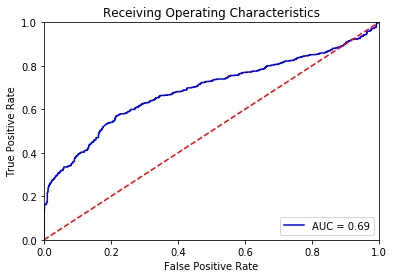

In [56]:
# =============================================================================
# ROC curve 
# =============================================================================
from sklearn.metrics import roc_curve,roc_auc_score

fpr, tpr, threshold = roc_curve(y_test, y_pred_prob_final)
auc_score = roc_auc_score(y_test, y_pred_prob_final)
plt.title('Receiving Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'%auc_score)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### I will compare if the additional feature increases the accuracy or decreases it by comparing the accuracy score and Area under Curve graph. 

### ROC curve for SVM model before and after adding additional features

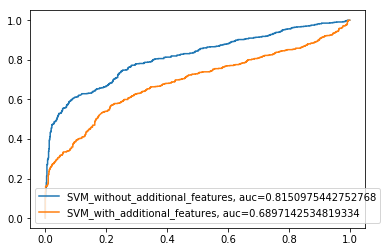

In [57]:
from sklearn import metrics

plt.figure(0).clf()

fig1 = plt.gcf()

fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr,tpr,label="SVM_without_additional_features, auc="+str(auc))


fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_prob_final)
auc = metrics.roc_auc_score(y_test, y_pred_prob_final)
plt.plot(fpr,tpr,label="SVM_with_additional_features, auc="+str(auc))

plt.legend(loc=0)

In [ ]:
fig1.savefig('plot.pdf', dpi=100)

### Hence, we will build our final classifier using body_score, tournaments, inlinks, answer_type and the  extracted features length of the text.